In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
data_train = []
with open('train_knn.txt','r') as file:
    new_reader = csv.reader(file,delimiter=',')
    for row in new_reader:
        data_train.append(row)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for i in range(len(data_train)):
    for j in range(len(data_train[i])):
        data_train[i][j] = int(data_train[i][j])

In [ ]:
a = []
b = []
for train in data_train:
    if train[2]==1:
        a.append([train[0], train[1]])
    elif train[2]==2:
        b.append([train[0], train[1]])
class_a = np.array(a)
class_b = np.array(b)

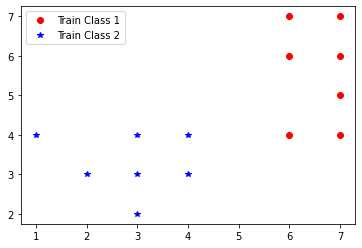

In [ ]:
plt.plot(class_a[:,0:1],class_a[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class_b[:,0:1],class_b[:, 1:], linestyle = '', marker = '*', color = 'b', label ="Train Class 2")
plt.legend()
plt.show()

In [ ]:
data_test = []
with open('test_knn.txt','r') as file:
    new_reader = csv.reader(file,delimiter=',')
    for row in new_reader:
        data_test.append(row)

In [ ]:
for i in range(len(data_test)):
    for j in range(len(data_test[i])):
        data_test[i][j] = int(data_test[i][j])

In [ ]:
def euclidean_distance(row1, row2):
    distance = (row1[0] - row2[0])**2 + (row1[1] - row2[1])**2
    return distance

In [ ]:
output = open('prediction.txt','a')

In [ ]:
pred_class1 = []
pred_class2 = []

def KNN(k, point):
    top = []
    output.write("Test Point: %d, %d\n"%(point[0], point[1]))
    cnt_1 = 0
    cnt_2 = 0
    for item in data_train:
        dist = euclidean_distance(point, item)
        top.append((dist, item[2]))
    top.sort(key=lambda x:x[0])
    for i in range(k):
        output.write("Distance %d: %d \tClass: %d\n"%(i+1, top[i][0], top[i][1]))
    for i in range(k):
        if(top[i][1]==1):
            cnt_1 = cnt_1+1
        else:
            cnt_2 = cnt_2+1
    if(cnt_1>=cnt_2):
        output.write("Predicted Class: 1")
        pred_class1.append(point)
    else:
        output.write("Predicted Class: 2")
        pred_class2.append(point)
    output.write("\n\n")

In [ ]:
k=int(input('Enter the Value of K: '))
for point in data_test:
    KNN(k, point)
output.close()

Enter the Value of K: 3


In [ ]:
pred_class1 = np.array(pred_class1)
pred_class2 = np.array(pred_class2)

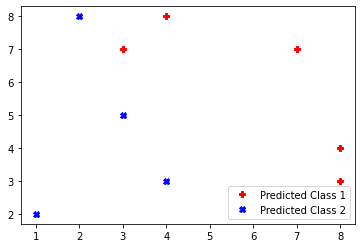

In [ ]:
plt.plot(pred_class1[:,0:1],pred_class1[:, 1:], linestyle = '', marker='P', color='r', label ="Predicted Class 1")
plt.plot(pred_class2[:,0:1],pred_class2[:, 1:], linestyle = '', marker = 'X', color = 'b', label ="Predicted Class 2")
plt.legend()
plt.show()